# Section 1:

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier

wine = pd.read_csv("Data/wine.txt", sep="\t")

### (a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

In [35]:
wine.describe()

,Clarity,Aroma,Body,Flavor,Oakiness,Quality,Region
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,0.923684,4.847368,4.684211,4.768421,4.255263,12.436842,1.868421
std,0.123975,1.082474,0.824138,1.028014,0.738039,2.045353,0.875216
min,0.500000,3.300000,2.600000,2.900000,2.900000,7.900000,1.000000
25%,0.825000,4.125000,4.150000,4.225000,3.700000,11.150000,1.000000
50%,1.000000,4.650000,4.750000,4.800000,4.100000,12.450000,2.000000
75%,1.000000,5.450000,5.375000,5.500000,4.775000,13.750000,3.000000
max,1.000000,7.700000,6.600000,7.000000,6.000000,16.100000,3.000000


In [80]:
wine.corr()

,Clarity,Aroma,Body,Flavor,Oakiness,Quality,Region
Clarity,1.000000,0.061902,-0.308378,-0.085160,0.183215,0.028441,-0.020320
Aroma,0.061902,1.000000,0.548910,0.736561,0.201644,0.707324,0.620101
Body,-0.308378,0.548910,1.000000,0.646659,0.152106,0.548702,0.435440
Flavor,-0.085160,0.736561,0.646659,1.000000,0.179761,0.790047,0.505918
Oakiness,0.183215,0.201644,0.152106,0.179761,1.000000,-0.047040,-0.059569
Quality,0.028441,0.707324,0.548702,0.790047,-0.047040,1.000000,0.507049
Region,-0.020320,0.620101,0.435440,0.505918,-0.059569,0.507049,1.000000


* One interesting finding is that wines from region 3 tend to be of higher __Quality__.
* __Flavor__ had the highest correlation with __Quality__ (.790047), followed by __Aroma__ (.707324).
* __Flavor__ and __Aroma__ are the only other pair of variables to have a correlation over .7 (.736561).
* __Flavor__ and __Quality__ had the highest correlation between all pairs of variables.
* __Oakiness__ seems to have to overall lowest correlation with all other variables.

### (b) Describe results after fitting linear regression models to each predictor.

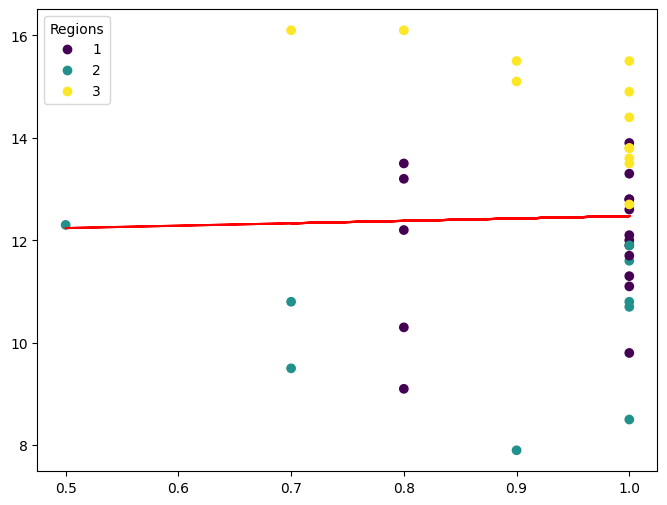

In [2]:
X = wine.Clarity.to_numpy().reshape([-1,1])
y = wine.Quality.to_numpy()
fit1 = LinearRegression().fit(X, y)

model1 = ols('Quality ~ Clarity',data=wine).fit()
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(X, y, c = wine['Region'], label="DATA")
ax.plot(X, model1.fittedvalues, "r-", label="OLS")
ax.legend(handles=scatter.legend_elements()[0], labels=['1', '2', '3'], title="Regions", loc = "best")
plt.show()

In [3]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                Quality   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                   0.02914
Date:                Sat, 23 Mar 2024   Prob (F-statistic):              0.865
Time:                        11:31:40   Log-Likelihood:                -80.589
No. Observations:                  38   AIC:                             165.2
Df Residuals:                      36   BIC:                             168.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0034      2.561      4.687      0.0

#### __Quality = y, Clarity = x:__
* Bad fit. Many plots of the same clarity at the right corresponding to different quality values. No clear pattern.
* R-squared = .001.

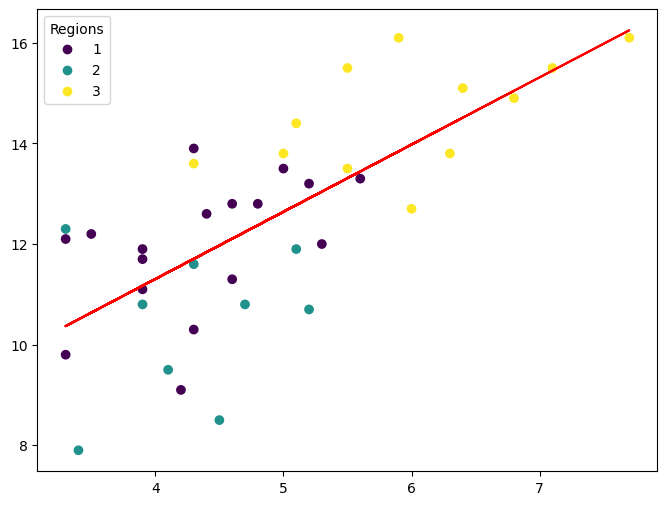

In [38]:
X = wine.Aroma.to_numpy().reshape([-1,1])
y = wine.Quality.to_numpy()
fit1 = LinearRegression().fit(X, y)

model1 = ols('Quality ~ Aroma',data=wine).fit()
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(X, y, c = wine['Region'], label="DATA")
ax.plot(X, model1.fittedvalues, "r-", label="OLS")
ax.legend(handles=scatter.legend_elements()[0], labels=['1', '2', '3'], title="Regions", loc = "best")
plt.show()

In [39]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                Quality   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     36.04
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           6.87e-07
Time:                        15:01:13   Log-Likelihood:                -67.423
No. Observations:                  38   AIC:                             138.8
Df Residuals:                      36   BIC:                             142.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9583      1.105      5.392      0.0

#### __Quality = y, Aroma = x__
* There is a trend with the points moving from the bottom left of the graph to the top right, which the line of regression captures.
* However, they are somewhat scattered from each other.
* R-squared = .5.

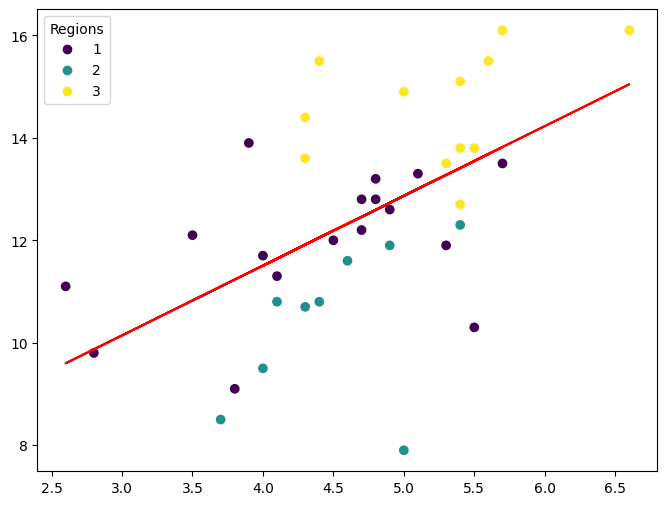

In [40]:
X = wine.Body.to_numpy().reshape([-1,1])
y = wine.Quality.to_numpy()
fit1 = LinearRegression().fit(X, y)

model1 = ols('Quality ~ Body',data=wine).fit()
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(X, y, c = wine['Region'], label="DATA")
ax.plot(X, model1.fittedvalues, "r-", label="OLS")
ax.legend(handles=scatter.legend_elements()[0], labels=['1', '2', '3'], title="Regions", loc = "best")
plt.show()

In [41]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                Quality   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     15.51
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           0.000361
Time:                        15:01:43   Log-Likelihood:                -73.799
No. Observations:                  38   AIC:                             151.6
Df Residuals:                      36   BIC:                             154.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0580      1.644      3.685      0.0

#### __Quality = y, Body = x__
* There is a trend with the points moving from the bottom left of the graph to the top right, although it is not very obvious.
* Points are rather scattered from each other.
* R-squared = .301.

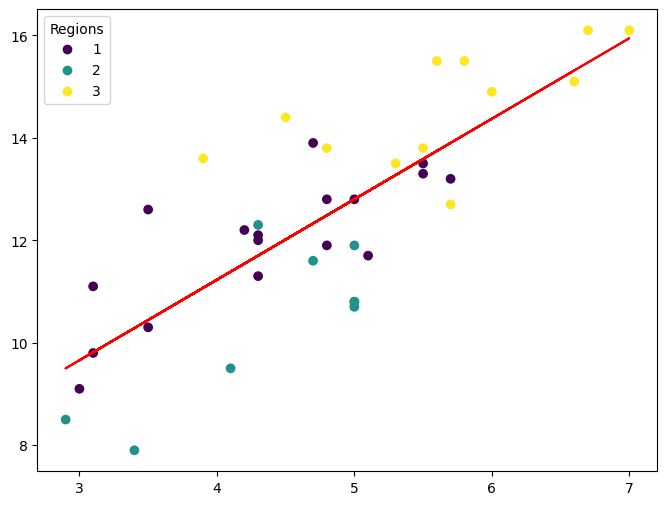

In [42]:
X = wine.Flavor.to_numpy().reshape([-1,1])
y = wine.Quality.to_numpy()
fit1 = LinearRegression().fit(X, y)

model1 = ols('Quality ~ Flavor',data=wine).fit()
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(X, y, c = wine['Region'], label="DATA")
ax.plot(X, model1.fittedvalues, "r-", label="OLS")
ax.legend(handles=scatter.legend_elements()[0], labels=['1', '2', '3'], title="Regions", loc = "best")
plt.show()

In [43]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                Quality   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     59.79
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           3.68e-09
Time:                        15:02:22   Log-Likelihood:                -62.011
No. Observations:                  38   AIC:                             128.0
Df Residuals:                      36   BIC:                             131.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9414      0.991      4.986      0.0

#### __Quality = y, Flavor = x:__
* There is a mildly clear trend with the points moving from the bottom left of the graph to the top right, which the line of regression captures.
* The points are somewhat scattered from each other.
* R-squared = .624.

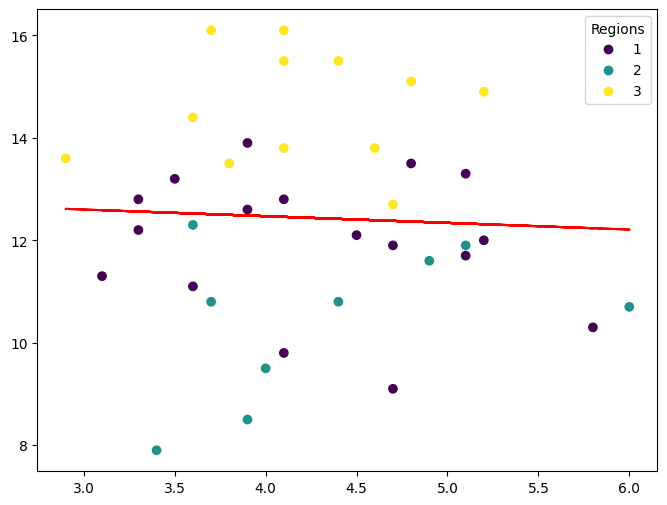

In [44]:
X = wine.Oakiness.to_numpy().reshape([-1,1])
y = wine.Quality.to_numpy()
fit1 = LinearRegression().fit(X, y)

model1 = ols('Quality ~ Oakiness',data=wine).fit()
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(X, y, c = wine['Region'], label="DATA")
ax.plot(X, model1.fittedvalues, "r-", label="OLS")
ax.legend(handles=scatter.legend_elements()[0], labels=['1', '2', '3'], title="Regions", loc = "best")
plt.show()

In [45]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                Quality   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                   0.07984
Date:                Sun, 17 Sep 2023   Prob (F-statistic):              0.779
Time:                        15:02:47   Log-Likelihood:                -80.563
No. Observations:                  38   AIC:                             165.1
Df Residuals:                      36   BIC:                             168.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.9916      1.992      6.522      0.0

#### __Quality = x, Oakiness = y:__
* Plots are very scattered around the center of the y axis, along the x axis. Bad fit.
* R-squared = .002.

#### __Significant Variables:__
* Based off of R-squared values, Flavor and Aroma can be significant variables.

### (c) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [72]:
model2 = ols('Quality ~ Clarity + C(Region) + Aroma + Body + Flavor + Oakiness',data=wine).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                Quality   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     22.10
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           3.29e-10
Time:                        15:51:19   Log-Likelihood:                -46.070
No. Observations:                  38   AIC:                             108.1
Df Residuals:                      30   BIC:                             121.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.8144      1.969      3.

* From these results, we can not reject the null hypothesis for variables Clarity, Aroma, Body, and Oakiness.

### (d) Based on your observation in (b) and (c), build a “reasonably good” multiple regression model for the data. Be sure to explore interactions of Region with other predictors. Carefully justify all the choices you make in building the model and verify the model assumptions.

In [77]:
# Is Region significant?
model3 = ols('Quality ~ Clarity + Aroma + Body + Flavor + Oakiness',data=wine).fit()
sm.stats.anova_lm(model3, model2, typ=1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,32.0,43.248006,0.0,NaN,NaN,NaN
1,30.0,25.140145,2.0,18.107861,10.80415,0.000292


In [2]:
model4 = ols('Quality ~ C(Region) + Flavor',data=wine).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                Quality   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     53.13
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           6.36e-13
Time:                        16:23:16   Log-Likelihood:                -47.576
No. Observations:                  38   AIC:                             103.2
Df Residuals:                      34   BIC:                             109.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.0943      0.791      8.

* The final model decided upon is 'Quality ~ C(Region) + Flavor'.
* It was determined that Region is significant by comparing ANOVA tables.
* It was determined that there was no significant interaction between Region and other variables.

### (e) Write the final model in equation form, being careful to handle the qualitative predictors and interactions (if any) properly.

![Section1e Solution](section1e.png "Section1e.png")

### (f) Use the final model to predict the Quality of a wine from Region 1 with other predictors set equal to their sample means. Also provide a 95% prediction interval for the response and a 95% confidence interval for the mean response. Interpret the results.


In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np
wine_r1 = wine[wine.Region == 1]
wine_r1 = sm.add_constant(wine_r1)
model5 = ols('Quality ~ C(Region) + Flavor',data=wine_r1).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                Quality   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     25.64
Date:                Sat, 23 Mar 2024   Prob (F-statistic):           0.000140
Time:                        12:17:19   Log-Likelihood:                -19.954
No. Observations:                  17   AIC:                             43.91
Df Residuals:                      15   BIC:                             45.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7311      1.055      6.378      0.0

/usr/local/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [10]:
pred = model5.get_prediction(wine_r1[:1]).summary_frame(alpha=0.05)
print(pred)

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  10.446572  0.363463       9.671869      11.221276      8.509166   

   obs_ci_upper  
0     12.383979  


In [11]:
pred2 = model5.get_prediction(wine_r1).summary_frame(alpha=0.05)
print(pred2)

         mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0   10.446572  0.363463       9.671869      11.221276      8.509166   
1   10.925987  0.289592      10.308737      11.543238      9.045993   
2   12.484087  0.225562      12.003312      12.964861     10.644379   
3   10.446572  0.363463       9.671869      11.221276      8.509166   
4   13.323063  0.333981      12.611199      14.034927     11.409917   
5   12.723794  0.250219      12.190466      13.257122     10.869659   
6   12.484087  0.225562      12.003312      12.964861     10.644379   
7   11.884818  0.202873      11.452405      12.317231     10.057152   
8   12.364233  0.216086      11.903655      12.824810     10.529700   
9   11.884818  0.202873      11.452405      12.317231     10.057152   
10  12.843648  0.264869      12.279094      13.408202     10.980291   
11  10.326719  0.383363       9.509600      11.143837      8.371965   
12  11.884818  0.202873      11.452405      12.317231     10.057152   
13  13

In [12]:
print(wine_r1)

    Clarity  Aroma  Body  Flavor  Oakiness  Quality  Region
0       1.0    3.3   2.8     3.1       4.1      9.8       1
1       1.0    4.4   4.9     3.5       3.9     12.6       1
2       1.0    3.9   5.3     4.8       4.7     11.9       1
3       1.0    3.9   2.6     3.1       3.6     11.1       1
4       1.0    5.6   5.1     5.5       5.1     13.3       1
5       1.0    4.6   4.7     5.0       4.1     12.8       1
6       1.0    4.8   4.8     4.8       3.3     12.8       1
7       1.0    5.3   4.5     4.3       5.2     12.0       1
9       1.0    4.3   3.9     4.7       3.9     13.9       1
18      1.0    4.6   4.1     4.3       3.1     11.3       1
26      1.0    3.9   4.0     5.1       5.1     11.7       1
31      0.8    4.2   3.8     3.0       4.7      9.1       1
32      1.0    3.3   3.5     4.3       4.5     12.1       1
34      0.8    5.0   5.7     5.5       4.8     13.5       1
35      0.8    3.5   4.7     4.2       3.3     12.2       1
36      0.8    4.3   5.5     3.5       5

* 95% confidence interval for mean response = [9.671869, 11.221276].
* 95% prediction interval = [8.509166, 12.383979].
* The prediction interval is wider than the confidence interval because it is accounting for more uncertainty.